# 4. 신경망 학습

이번 장의 주제는 신경망 학습

여기서 학습이란 **훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것**을 뜻한다.

이번 장에서는 신경망이 학습할 수 있도록 해주는 지표인 **손실 함수**를 소개한다.

이 <font color = red> **손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표** </font> 이다.

이번 장에서는 손실 함수의 값을 가급적 작게 만드는 기법으로, 함수의 기울기를 활용하는 경사법을 소개한다.


## 데이터에서 학습한다!

신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다. 데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻.

이를테면 2장의 퍼셉트론 예에서는 진리표를 보면서 사람이 수작업으로 매개변수 값을 설정했고, 이 때 매개변수가 3개였다.

하지만 실제 신경망에서는 매개변수가 수천에서 수만, 층을 깊게 할 경우 수억까지 이를 수도 있기 때문에 **매개변수를 수작업으로 정한다는 것은 아예 불가능** 하다.

이번 장에서는 신경망 학습(**데이터로부터 매개변수의 값을 정하는 방법**)에 대해 설명하고 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현해 볼 것이다.

<font color = blue> NOTE. 2장의 퍼셉트론도 선형 분리 가능 문제라면 데이터로부터 자동으로 학습할 수 있다. 하지만 비선형 분리 문제는 자동으로 학습할 수 없다. </font>


### 데이터 주도 학습

기계학습은 데이터가 생명이다. 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는 것이 기계학습.

그래서 데이터 없이는 아무것도 시작되지 않는다. 즉, **기계학습의 중심에는 데이터가 존재** 한다.

따라서 기계학습은 인간의 개입을 최소화하며, 수집한 데이터로부터 패턴을 찾으려 시도한다.

게다가 신경망과 딥러닝은 기존 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배제할 수 있게 해주는 중요한 특성을 지녔다. 여기서 말하는 특징은 **입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기**를 가리킨다.

예를 들어, 사람마다 필체가 다르기 때문에 5를 제대로 분류하는 프로그램을 고안해 설계하기란 의외로 어려운 문제이다. 사람이라면 어렵지 않게 인식하지만, 그 안에 숨은 규칙성을 명확한 로직으로 풀기가 힘들다.
따라서 5를 인식하는 알고리즘을 밑바닥부터 '설계하는' 대신, **주어진 데이터를 잘 활용**해서 해결하고 싶어질 것이다.

이런 방법의 하나로, **이미지에서 특징을 추출하고, 그 특징의 패턴을 기계학습 기술로 학습**하는 방법이 있다.

컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 사용, 이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있따.

기계학습에서는 모아진 데이터로부터 규칙을 찾아내는 역할을 기계가 담당한다. 다만, 이미지를 벡터로 변환할 때 사용하는 특징은 **여전히 사람이 설계하는 것**임에 주의해야 한다. 즉, 특징과 기계학습을 활용한 접근에도 문제에 따라서는 사람이 적절한 특징을 생각해내야 하는 것이다.

그렇지만 신경망은 이미지를 **"있는 그대로" 학습** 한다. 두 번째 접근 방식에서는 특징을 사람이 설계했지만, 신경망은 이미지에 중요한 특징까지도 기계가 스스로 학습할 것이다.

신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점에 있다. 예를 들어 5를 인식하는 문제든, 개를 인식하는 문제든, 사람의 얼굴을 인식하든 문제든, 세부사항과 상관없이 신경망은 주어진 데이터를 온전ㄴ히 학습하고 주어진 문제의 패턴을 발견하러 시도한다.

즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end to end'로 학습할 수 있다.


### 훈련 데이터와 시험 데이터

기계학습 문제는 데이터를 훈련 데이터와 시험 데이터(training data and test data)로 나눠 학습과 실험을 수행하는 것이 일반적

우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다. 그런 다음 시험 데이터를 사용하여 훈련된 모델의 실력을 평가한다.

훈련 데이터와 시험 데이터를 나누는 이유는 우리가 원하는 것이 **범용적으로 사용할 수 있는 모델**이기 때문이다. 이 범용 능력을 제대로 평가하기 위해 훈련 데이터와 시험 데이터를 분리한다.

범용 능력이란 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력이다. 이 **범용 능력을 획득**하는 것이 기계학습의 최종 목표가 될 것이다.

데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없다. 수중의 데이터셋은 제대로 맞히더라도 다른 데이터셋에는 엉망인 일이 벌어지기 때문이다. 한 데이터셋에 지나치게 최적화된 상태를 **오버 피팅** 이라고 하는데, 오버피팅을 피하는 것은 기계학습의 중요한 과제이기도 하다.


## 손실 함수

만약 사람들에게 "지금 얼마나 행복하나요?"라고 물으면 뭐라고 대답할까?

"아주 행복하죠" 나 "그리 행복한 거 같진 않아요"라는 막연한 답이 돌아올 것이다. 그런데 "현재 내 행복 지수는 10.23입니다"라고 대답한다면 질문한 사람이 당황할 것이다. 하나의 지표를 가지고 행복을 수치적으로 판단했다는 것이기 때문이다.

신경망 학습에서도 이와 같은 일을 수행한다. 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현하고, 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 과정이다.

행복 지표를 가진 사람이 그 지표를 근거로 '최적의 인생'을 탐색하듯, 신경망도 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색한다.

신경망 학습에서 사용하는 지표는 **손실 함수**라고 한다. 이 손실 함수는 임의의 함수를 사용할 수도 있지민 일반적으로는 **오차제곱합과 교차 엔트로피 오차**를 사용한다.


### 오차제곱합

가장 많이 쓰이는 손실 함수는 **오차 제곱합(SSE)** 이다. 수식으로는 다음과 같다.

$$ E = \frac{1}{2} \sum_{k}{(y_k - t_k)^2} $$

$y_k$는 신경망의 출력(신경망이 추정한 값), $t_k$는 정답 레이블, k는 데이터의 차원 수를 나타낸다.

예를 들어, 손글씨 숫자 인식 예에서 $y_k$와 $t_k$는 다음과 같은 원소 10개짜리 데이터이다.

In [2]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

이 배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 0, 1, 2, ... 일 때의 값이다.

여기에서 신경망의 출력 y는 소프트맥스 함수의 출력이다. 소프트맥스 함수의 출력은 확률로 해석할 수 있으므로,
이 예에서는 이미지가 0일 확률은 0.1, 1일 확률은 0.05, 2일 확률은 0.6, ... 이라고 해석된다.

정답 레이블인 t는 정답을 가리키는 위치의 원소는 1로, 그 외에는 0으로 표기한다.
여기에서는 숫자 '2'에 해당하는 원소의 값이 1이므로 정답이 2임을 알 수 있다.

이처럼 **한 원소만 1로 하고 그 외는 0으로 나타내는 표기법을 원-핫 인코딩** 이라 한다.

오차제곱합은 위의 식과 같이 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차를 제곱한 후, 그 총합을 구한다.

이 오차제곱합을 파이썬으로 구현해보자.,

In [6]:
import numpy as np
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [7]:
# 예2 : '7'일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

이 실험의 결과로 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작은 것을 알 수 있다.

오차제곱합 기준으로는 첫 번째 추정 결과가 오차가 더 작으니 정답에 더 가까울 것으로 판단할 수 있다.

### 교차 엔트로피 오차

또 다른 손실 함수로서 교차 엔트로피 오차도 자주 이용한다.
교차 엔트로피 오차의 수식은 다음과 같다.

$$E = -{\sum}_{k}{t_klog y_k}$$

여기서 $log$는 밑이 $e$인 자연로그이다.

$y_k$는 신경망의 출력, $t_k$는 정답 레이블이다.
$t_k$는 정답에 해당하는 인덱스의 원소만 1이고 나머지가 0인 원-핫 인코딩이다.

그래서 위의 식은 실질적으로 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하느 식이 된다.

예를 들어, 정답 레이블은 2가 정답이라 하고 이때의 신경망 출력이 0.6이라면 교차 엔트로피 오차는 $-log0.6 = 0.51$이 된다.

또한, 같은 조건에서 신경망 출력이 0.1이라면 $-log0.1 = 2.30$이 된다.

**즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.**

/var/folders/d7/8zsbg3r51rs_vl832mx18q_00000gn/T/ipykernel_52796/2713818593.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


(-5.0, 0.0)

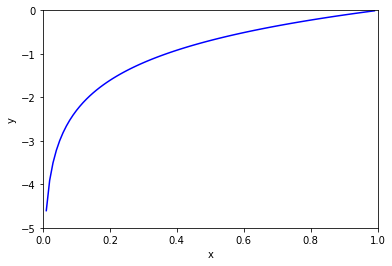

In [14]:
# 자연로그 y = logx 의 그래프
import matplotlib.pyplot as plt
x = np.arange(0, 1.0, 0.01)
y = np.log(x)

plt.plot(x, y, color = "blue")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 1)
plt.ylim(-5, 0)

위의 그림에서 보듯이 x가 1일 때 y는 0이 되고, x가 0에 가까워질수록 y의 값은 점점 작아진다.

마찬가지로, 위 식도 **정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 된다.** 반대로 정답일 때의 출력이 작아질수록 오차는 커진다.

그렇다면 파이썬으로 교차 엔트로피 오차를 구현해보자. 

In [15]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

- y와 t는 넘파이 배열이다.

- delta에 대한 설명 : np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없기 때문이다. 

In [16]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [17]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

오차 값이 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한다.

앞서 오차제곱합의 판단과 일치한다.

### 미니배치 학습

기계학습 문제는 훈련 데이터를 사용해 학습한다. 더 구체적으로 말하면, 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 줄여주는 매개변수를 찾아낸다.

이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다. 즉, 훈련 데이터가 100개 있으면 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는 것이다.

지금까지는 데이터 하나에 대한 손실 함수만 생각해왔으니, 이제 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 고려한다.

교차 엔트로피 오차부터 보자.

$$E = -\frac{1}{N} \sum_{n} \sum_{k}{t_{nk} log y_{nk}}$$

이 때 데이터가 N개라면 $t_{nk}$는 n번째 데이터의 k번째 값을 의미한다. ($y_{nk}$는 신경망의 출력, $t_{nk}$은 정답 레이블)

데이터 하나에 대한 손실 함수를 **N개의 데이터로 확장** 한 것으로, 마지막에 데이터의 개수인 N으로 나눠 정규화하면서 **평균 손실 함수**를 구하고 있다.

이렇게 평균을 구해 사용하면 **훈련 데이터 개수와 관계없이 언제든 통일된 지표** 를 얻을 수 있다.

그렇지만 거대한 데이터셋의 경우는 일일히 손실 함수를 계산하는 것은 시간이 많이 걸린다. 이런 경우 데이터 일부를 추려 전체의 근사치로 이용할 수 있다.

신경망 학습에서도 이와 같이 **훈련 데이터로부터 일부만 골라 학습을 수행** 한다. 이것을 **미니 배치**라고 하며, 이러한 학습 방법은 미니패치 학습이라고 한다.

In [19]:
import sys, os
os.getcwd()

'/Users/choeunsol/Python'

In [22]:
os.chdir("/Users/choeunsol/deep-learning-from-scratch-master/ch03")
sys.path.append(os.pardir)

In [25]:
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)

(60000, 784)


In [26]:
print(t_train.shape)

(60000, 10)


우리의 목표는 이 train data에서 무작위로 데이터를 뽑아 미니 배치를 수행하는 것이다.

넘파이의 np.random.choice() 함수를 쓰면 간단히 해결할 수 있다.

In [29]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # R의 sample 함수와 비슷하다고 생각하면 될 듯!

# np.random.choice() 함수를 통해 랜덤추출의 인덱스를 만들어주고, 배치 사이즈만큼의 배치 데이터셋을 만들어준다.
x_batch = x_train[batch_mask] # batch_mask로 단일 인덱싱할 경우 brain_mask-1 번째의 행을 추출한다. 즉, 이미지를 뽑아낸다.
y_batch = t_train[batch_mask]

### (배치용) 교차 엔트로피 오차 구현하기

그럼, 미니배치 같은 배치 데이터를 지원하는 교차 엔트로파 오차는 어떻게 구현할까? 아까 구현했던 함수를 조금만 바꿔주면 된다.

여기에서는 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현할 것이다.

In [57]:
def cross_entropy_error(y, t):
    if y.ndim == 1: # 만약 y가 1차원 배열이라면
        t = t.reshape(1, t.size) # t를 1차원 배열로 변환하고 전체 사이즈를 열로 가지면서 1행인 1차원 벡터로 변형한다.
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0] # 이미지의 전체 개수 (28*28의 데이터를 담고 있는 하나의 행)으로 이미지 당 평균을 계산한다.
    return -np.sum(t * np.log(y+1e-7)) / batch_size

In [59]:
## size와 shape의 활용을 주의하자.

x_train.size # n*n 배열의 [전체 데이터 수]를 나타낸다.

47040000

In [60]:
x_train.shape # n*n 배열의 [형상], 즉 n*n을 그대로 출력한다.

(60000, 784)

In [64]:
x_train.ndim # 배열의 차원 수. 행과 열로 되어 있으면 2차원!

2

<코드 해석>

1. 이 코드에서 $y$는 신경망의 출력, t는 정답 레이블이다.

2. y가 1차원이라면, 즉 데이터 하나 당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꿔준다.

3. 그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.

정답 레이블이 원-핫 인코딩이 아니라 2나 7과 같은 숫자 레이블로 주어졌을 때 교차 엔트로피 오차도 구현해보자.

In [66]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0] # y의 원소 개수로 나눠주어야 평균을 구할 수 있으므로 dataset y의 행 개수를 batch_size로 설정한다.
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size # np.arange(argu)는 0부터 argu - 1까지의 배열을 생성.

# t는 정답 레이블이므로 y을 인덱싱할 때 t를 열 부분에 넣으면 정답에 해당되는 원소만 추출된다.
# batch_size는 앞에서 정의한 것과 같이 10이므로, batch_size에 해당하는 이미지를 추출하도록 설정한다.
# 앞에서 t가 원-핫 인코딩일 경우에는 t가 0일 때 아무런 인트로피 오차가 발생하지 않으므로 곱해줘도 됐지만, 원-핫 인코딩이 되지 않을 시에는 t를 이용해 인덱스한다.
# 다행히도, t에 해당되지 않은 열은 인트로피가 발생하지 않으므로 t의 레이블에 해당되는 열들만 뽑아줘도 된다.

이 구현에서는 **원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다**는 것이 핵심이다.

다시 말하면 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다.

그래서 원-핫 인코딩 시 t * np.log(y) 였던 부분을
np.log(y[np.arnage(batch_size), t] + 1e-7) / batch_size
으로 구현한다.

np.arange(batch_size)는 0부터 batch_size - 1까지의 배열을 생성한다.

예를 들어 batch_size가 5이면 np.arange(batch_size)는 [0,1,2,3,4]라는 배열을 생성한다.

t에는 레이블이 **[2,7,0,9,4]** 와 같이 설정되어 있으므로 위의 함수는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다.

### 왜 손실 함수를 설정하는가?

굳이 손실 함수를 사용하는 이유가 무엇일까?

이를 위해서는 신경망 학습에서의 '미분'의 역할에 주목한다면 해결된다.

신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다.

이 때 **매개변수의 미분(정확히는 기울기)** 을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

가령 여기에 가상의 신경망이 있고, 그 신경망의 어느 한 가중치 매개변수에 주목한다고 할 때,
그 가중치 매개변수의 손실 함수 미분이란 **'가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하냐'** 라는 의미이다.

만일 이 미분 값이 음수이면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있다.

그러나 **<font color = red> 만일 이 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않는다.** </font>

그래서 가중치 매개변수의 갱신은 거기서 멈춘다.

정확도를 지표로 삼아서는 안 되는 이유는 **미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신할 수 없기** 떄문임.

<font color = grey> *신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.* </font>

예를 들어 한 신경망이 100장의 훈련 데이터 중 32장을 올바르게 인식한다고 하자. 그렇다면 정확도는 32%이다.

만약 정확도가 지표였다면 가중치 매개변수의 값을 조금 바꾼다고 해도 **정확도는 그대로 32%일 것** 이다.

즉, 매개변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지되고, 정확도가 개선된다고 하더라도 그 값은 연속적인 변화보다는 불연속적인 띄엄띄엄한 값으로 바뀌어버린다.

정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다.

이는 '계단 함수'를 활성화 함수로 사용하지 않는 이유와도 같다. 활성화 함수로 계단 함수를 사용하면 지금까지 설명한 것과 같은 이유로 신경망 학습이 잘 이루어지지 않는다.

계단 함수의 미분은 [매끄럽지 않으므로] 대부분의 장소에서 0이다. (정확히 말하자면 0이 아닌 곳에서 0이다.)

그 결과, 계단 함수를 이용하면 손실 함수를 지표로 삼는 게 아무 의미가 없게 된다. 매개변수의 작은 변화가 주는 파장을 계단 함수가 말살하여 손실 함수의 값에는 아무런 변화가 나타나지 않기 때문이다.

계단 함수는 한간만 변화를 일으키지만, 시그모이드 함수의 미분은 세로축의 값이 연속적으로 변하고 따라서 곡선의 기울기도 연속적으로 변한다.

즉, 시그모이드 함수의 미분은 **어느 장소라도 0이 되지 않는다**.

이는 신경망 학습에서 중요한 성질로, **기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습** 할 수 있는 것이다. 우리의 목표는 결국 데이터에 구애받지 않고 미분값이 0 = 극소량의 변화에도 손실 함수의 유의미한 변화가 없음 이라는 결론을 얻고 싶기 때문이다.

## 수치 미분

경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다.

### 미분

마라톤 선수가 처음부터 10분에서 2km씩 달렸다고 해보자. 이때의 속도는 간단히 2/10 = 0.2 [km/분]이라고 계산할 수 있다.

즉, 1분에 0.2km만큼의 속도(변화)로 뛰었다고 해석할 수 있다.

이 마라톤 예에서는 **'달린 거리'가 '시간'에 대해서 얼마나 변화했는가** 를 계산했다. 다만 여기서 10분에 2km를 뛰었다는 것은, 정확하게는 10분 동안의 '평균 속도'를 구한 것이다.

미분은 **특정 순간의 변화량**을 뜻한다. 그래서 10분이라는 시간을 가능한 한 줄여(직전 1분에 달린 거리, 직전 1초에 달린 거리, 직전 0.1초에 달린 거리, ... 식으로 갈수로 간격을 줄여) **한 순간의 변화량** 을 얻는 것이다.

이처럼 미분은 한순간의 변화량을 표시한 것이다. 수식으로는 다음과 같다.

$$\frac{df(x)}{dx} = \lim_{h \to 0}\frac{f(x+h) - f(x)} {h}$$


위 식은 함수의 미분을 나타낸 식이다.

좌변은 $f(x)$의 $x$에 대한 미분($x$에 대한 $f(x)$의 변화량)을 나타내는 기호이다.
결국, $x$의 작은 변화가 함수 $f(x)$을 얼마나 변화시키느냐를 의미한다. 이때의 시간의 작은 변화, 즉 시간을 뜻하는 $h$를 한없이 0에 가깝게 한다는 의미를 $\lim_{h \to 0}$으로 나타낸다.

그렇다면 파이썬으로 이를 구현해보자.

In [80]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

이 구현에는 두 가지의 문제가 있다.

1. h에 최대한 작은 값을 대입하고 싶었기에 (가능하다면 h를 0으로 무한히 가깝게 하고 싶으니) 1e-50이라는 작은 값을 이용했다. 하지만 이 방식은 **반올림 오차 문제**를 일으킨다. 반올림 오차는 작은 값이 생략되어 최종 계산 결과에 오차가 생기게 한다. 

In [81]:
np.float32(1e-50)

0.0

위와 같이 1e-50으 float32(32비트 부동소수점)으로 나타내면 0.0이 되어, 올바로 표현할 수 없다.
    너무 작은 값을 이용하면 컴퓨터로 계산하는 데 문제가 된다는 것이다.
    여기가 첫 번째 개선 포인트로, 미세한 값 $h$로 $10^{-4}$을 이용해보자.
    이 값을 사용하면 좋은 결과를 얻는다고 알려져 있다.
    
2. 두 번재 개선은 함수 f의 차분과 관련된 것.
    앞의 구현에서는 $x+h$와 $x$ 사이의 함수 f의 차분을 계산하고 있지만, 애당초 이 계산에는 오차가 있다는 사실에 주의해야 한다.
    진정한 미분은 $x$ 위치의 함수의 기울기에 해당하지만, 이 구현에서의 미분은 $(x+h)$와 $x$ 사이의 기울기에 해당한다.
    
    그래서 진정한 미분과 이번 구현의 값은 '엄밀히 말하자면' 일치하지 않는다.
    이 차이는 $h$을 무한히 0으로 좁히는 것이 불가능해 생기는 한계이다.
    
    위와 같은 수치 미분에는 오차가 포함된다. 이 오차를 줄이기 위해 $(x+h)$와 $(x-h)$ 일 때의 함수 $f$의 차분을 계산하는 방법을 쓰기도 한다.
    이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 **중앙 차분 혹은 중앙 차분** 이라고 한다.
    
그렇다면 두 개선점을 이용하여 수치 미분을 다시 구현해보자.

In [92]:
def numerical_diff(f,x):
    h = 1e-4 # 0.001
    return ((f(x+h) - f(x-h)) / (2*h))

<font color = blue> *NOTE. 여기에서 하는 것처럼 아주 작은 차분으롤 미분하는 것을 수치 미분이라 한다. 한 편, 수식을 전개해 미분하는 것은 해석적이라는 말을 이용하여 '해석적 해' 혹은 '해석적으로 미분하다' 등으로 표현한다. 가령 $y=x^2$의 미분은 해석적으로는 $/frac{dy}{dx} = 2x으로 풀어낼 수 있다. 그래서 $x=2$일 때 $y$의 미분은 4가 된다. 해석적 미분은 오차를 포함하지 않는 진정한 미분 값을 구해준다.*

### 수치 미분의 예

앞 절의 수치 미분을 사용하여 간단한 함수를 미분해보자.

$$y = 0.01x^2 + 0.1x $$

을 파이썬으로 구현하면 

In [90]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

이다.

이어서 이 함수를 그려보면 

Text(0, 0.5, 'f(x)')

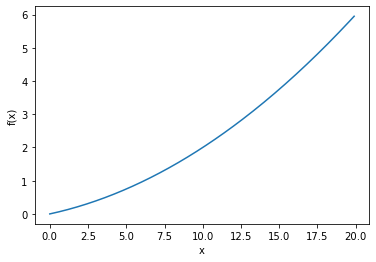

In [87]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x)")

그럼 $x=5$일 때와 10일 때 이 함수의 미분을 계산해보자.

In [93]:
numerical_diff(function_1, 5)

0.1999999999990898

In [94]:
numerical_diff(function_1, 10)

0.2999999999986347

### 편미분

$$f(x_0, x_1) = {x_0}^2 + {x_1}^2$$

이 식을 보자.

변수가 2개라는 점에 주의해야 한다.

In [3]:
def function_2(x):
    return x[0]**2 + x[1]**2 # 또는 return np.sum(x**2)

이것을 미분하려면 **"어느 변수에 대한 미분이냐"** 를 구분해야 한다.

이와 같이 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다.

이 편미분을 수식으로는 $\frac{\partial f}{\partial x_0}$ 나 $\frac{\partial f}{\partial x_1}$ 이라고 쓴다.

그렇다면 간단한 문제를 풀어보자.

#### 문제 1. $x_0 = 3, x_1 = 4$일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$을 구하라.

In [97]:
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.0 # x0에 대한 편미분이므로 x1 값을 넣어준다,.

numerical_diff(function_tmp1, 3.0)

6.00000000000378

#### 문제 2. $x_0 = 3, x_1 = 4$일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_1}$을 구하라. 

In [98]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

이 문제들은 변수가 하나인 함수를 정의하고, 그 함수를 미분하는 형태로 구현해서 풀었다.

이처럼 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다.

단, 여러 변수 중 **목표 변수 하나에 초점을 맞추고** 다른 변수는 값을 고정한다.

## 기울기

앞 절의 예에서는 $x_0 \text{와} x_1$의 편 미분을 변수별로 따로 계산했다.

그럼 $x_0$과 $x_1$의 편미분을 동시에 계산하고 싶다면 어떻게 할까?

가령, $x_0 = 3, x_1 = 4$일 대, $(x_0, x_1)$ 양쪽의 편미분을 묶어서 $\left (\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right)$ 처럼 **모든 변수의 편미분을 벡터로 정리한 것을 기울기** 라고 한다.

기울기는 다음과 같이 구현할 수 있다.

In [2]:
def numerical_gradient(f, x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같지만 원소가 모두 0인 배열을 생성한다.
    
    for idx in range(x.size):
        tmp_val = x[idx] # x의 idx번째 인자를 가진 tmp_val
    
    # f(x+h) 계산
        x[idx] = tmp_val + h # tmp_val에 미세한 값(h)을 더해서 x에 집어넣는다.
        fxh1 = f(x) # 이 집어넣은 x을 함수에 대입하여 f(x+h)의 값인 fxh1을 얻는다.
    
    # f(x-h) 계산
        x[idx] = tmp_val - h # tmp_val에 미세한 값(h)을 빼서 x에 집어넣는다.
        fxh2 = f(x) # 이 집어넣은 x을 함수에 대입하여 f(x-h)의 값인 fxh2를 얻는다.
    
        grad[idx] = (fxh1 - fxh2) / (2*h) # 빈 벡터인 grad에 미분의 정의를 활용하여 미분 값을 넣는다.
        x[idx] = tmp_val # 값 복원 -> 다시 루프가 돌 수 있도록 만들어준다.
    
    return grad

복잡해 보이지만, 동작 방식은 변수가 하나일 때의 수치 미분과 거의 같다.

- np.zeros_like(x)는 x와 형상이 같고 원소가 모두 0인 배열이다.

- numerical_gradient(f, x) 함수의 f는 함수이고, x는 넘파이 배열이므로 넘파이 배열 x의 각 원소에 대해서 수치 미분을 구한다.

그렇다면 이 함수를 이용하여 직접 기울기를 계산해보자.

In [8]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [9]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [10]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

이처럼 $(x_0, x_1)$의 각 점에서의 기울기를 계산할 수 있다.

[그림 4-9 참고]

그림에서 기울기는 가장 낮은 장소를 가리키지만, 실제로는 반드시 그렇다고는 할 수 없음.

사실, 기울기는 낮아지는 방향을 가리킨다.

더 정확히 말하자면, <font color = red> **기울기가 가리키는 쪽은 함수의 출력 값을 가장 크게 줄이는 방향** </font> 이다.


### 경사법(경사 하강법)

기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아낸다. 신경망 역시 최적의 매개변수(가중치와 편향)을 학습 시에 찾아야 한다.

여기에서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값이다. 그러나 일반적인 문제의 손실 함수는 매우 복잡하다.

매개변수 공간이 광대해서 어디가 최솟값이 되는 곳인지를 짐작할 수 없기 때문이다.

이런 상황에서 기울기를 잘 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것이 경사법이다.

여기에서 주의할 점은 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 **기울기** 라는 것이다.

그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉, 그쪽이 정말로 나아갈 방향인지는 보장할 수 없다.

실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.


<font color = red> *WARNING. 함수가 극솟값, 최솟값, 그리고 안장점이 되는 장소에서는 기울기가 0이다. 극솟값은 국소적인 최솟값, 즉 한정된 범위에서의 최솟값인 점이다. 안장점은 어느 방향에서 보면 극댓값이고, 다른 방향에서 보는 극솟값이 되는 점이다. 경사법은 기울기가 0인 장소를 찾지만 **그것이 반드시 최솟값이라고는 할 수 없다** (극솟값이나 안장점일 가능성이 있다). 또, 복잡하고 찌그러진 모양의 함수라면 평평한 곳으로 파고들면서 고원이라고 하는, 학습이 진행되지 않는 정체기에 빠질 수 있다.* </font>

기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, **그 방향으로 가야 함수의 값을 줄일 수 있다**.

그래서 최솟값이 되는 장소를 찾는 문제(아니면 가능한 한 작은 값이 되는 장소를 찾는 문제)에서는 기울기 정보를 단서로 **나아갈 방향**을 정해야 한다.

경사법은 **현 위치에서 기울어진 방향으로 일정 거리만큼 이동** 한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다. 이렇게 해서 함수의 값을 점차 줄이는 것이 **경사법** 이다.

경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법이며, 특히 신경망 학습에서는 경사법을 많이 사용한다.

<font color = blue> *Note. 경사법은 최솟값을 찾느냐, 최댓값을 찾느냐에 따라 이름이 다르다. 전자를 경사 하강법, 후자를 경사 상승법이라고 한다. 다만 손실 부호의 부호를 반전시키면 최솟값을 찾는 문제와 최댓값을 찾는 문제는 같은 것이니 하강이냐 상승이냐는 본질적으로 중요하지 않다. 일반적으로 신경망(딥러닝) 분야에서의 경사법은 '경사 하강법'으로 등장할 때가 많다.* </font>

그럼, 경사법을 수식으로 나타내보자.


$x_0 = x_0 - \eta \frac{\partial f}{\partial x_0} \\
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}$

위 식의 $\eta$(에타)는 **갱신하는 양**을 나타낸다.

이를 신경망 학습에서는 **학습률** 이라고 한다. 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 **매개변수 값을 얼마나 갱신하느냐**를 정하는 것이 학습률이다.

위 식은 1회에 해당하는 갱신이고, 이 단계를 반복한다. 즉, **변수의 값을 갱신하는 단계를 여러 번 반복하면서 서서히 함수의 값을 줄이는 것**이다.

여기에서는 변수가 2개인 경우를 보여주었지만, 변수의 수가 늘어도 같은 식(각 변수의 편미분 값)으로 갱신하게 된다.

또한, 학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야 한다.

일반적으로 이 값이 너무 크거나 작으면 '좋은 장소'를 찾아갈 수 없다.

신경망 학습에서는 보통 이 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행한다.

경사 하강법은 다음과 같이 간단하게 구현할 수 있다.

In [26]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x # x를 갱신할 것이므로 init_x를 입력값으로 넣고, 여기서 x로 바꿔준다.
    
    for i in range(step_num): # step_num 동안 동작을 반복한다.
        grad = numerical_gradient(f, x) # f는 최적화하려는 함수이므로 손실 함수
        x -= lr * grad # x - lr * grad 값으로 조정한다.
    return x

<코드 해석>

인수 f는 최적하려는 함수

init_x는 초기값

lr은 learning rate을 의미하는 학습률

step_num은 경사법에 따른 반복 횟수를 뜻한다.

이 함수를 사용하면 함수의 극솟값을 구할 수 있고, 잘하면 최솟값을 구할 수도 있다.

#### 문제 : 경사법으로 $f(x_0, x_1) = {x_0}^2 + {x_1}^2$ 의 최솟값을 구하여라.


In [28]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([3.0, 4.0])
gradient_descent(function_2, init_x, lr = 0.1, step_num = 100)

array([6.11110793e-10, 8.14814391e-10])

여기에서는 초기값을 $(-3.0, 4.0)$으로 설정한 후 경사법을 이용해 최솟값 탐색을 시작한다.

최종 결과는 위와 같다. 거의 0과 가까운 결과.

실제로 진정한 최솟값은 $(0,0)$으로 거의 정확한 결과를 얻은 것.


그렇다면 학습률이 너무 크거나 너무 작으면 어떻게 될까?

In [30]:
# 학습률이 너무 큰 예 : lr = 10.0

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, 10.0, 100)

array([-2.58983747e+13, -1.29524862e+12])

In [32]:
## 엄청난 값으로 발산한다.

# 학습률이 너무 작은 예 : lr = 1e-10
gradient_descent(function_2, init_x, 1e-10, 100)

array([-2.58983747e+13, -1.29524862e+12])

In [33]:
## 초기ㅏㄱㅂㅅ인 (-3.0, 4,0)과 별 차이가 없다.

이 실험 결과와 같이 학습률이 너무 크면 **큰 값으로 발산** 해 버린다.

반대로 너무 작으면 **거의 갱신되지 않은** 채 끝나버린다.

<font color = blue> *NOTE. 학습률 같은 매개변수를 하이퍼파라미터(초매개변수)라고 한다. 이는 가중치나 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수이다. 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의하여 **자동으로 획득되는 매개변수** 인 반면, 핛브률 같은 하이퍼퍼러미터는 **사람이 직접 설정해야 하는 매개변수** 이다. 일반적으로는 이 하이퍼퍼러미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다.*

### 신경망에서의 기울기

기울기는 <font color = red> **가중치 매개변수에 대한 손실 함수의 기울기**</font> 이다.
    예를 들어 형상이 2 x 3, 가중치가 W, 손실 함수가 L인 신경망을 생각해보자.
    이 경우 경사는 $\frac{\partial L}{\partial W}$ 으로 나타낼 수 있다.
    
수식으로는 다음과 같다.

$$W = \begin {pmatrix} 
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end {pmatrix}$$

$$\frac{\partial L}{\partial W} = \begin{pmatrix}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}}
\end{pmatrix}$$

$\frac{\partial L}{\partial W}$ 의 각 원소는 각각의 원소에 관한 편미분이다.
예를 들어 1행 1번째 원소인 $\frac{\partial L}{\partial w_{11}}$은 $w_{11}$을 조금 변경했을 때 **손실 함수 L이 얼마나 변화하느냐** 를 나타낸다. 여기서 중요한 점은 **$\frac{\partial L}{\partial W}$의 형상이 $W$와 같다는 것.**

실제로 위 식에서 $W$와 $\frac{\partial L}{\partial W}$의 형상은 모두 2*3이다.

그렇다면 간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드를 구현해보자.

In [16]:
import sys, os
os.getcwd()
os.chdir("/Users/choeunsol/deep-learning-from-scratch-master/ch03")
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화, np.random.randn은 정규분포 float를 array로 생성한다.
        ## np.random.randn에 인수가 없을 경우는 단일 인자로 생성한다.
        
    def predict(self, x): # 예측 함수
        return np.dot(x, self.W) # x * W을 구현
    
    def loss(self, x, t):
        z = self.predict(x) # 예측의 결과
        y = softmax(z) # 예측 후 활성화 함수에 넣은 값. 이것으로 t(정답 레이블)과 비교할 것이다.
        loss = cross_entropy_error(y, t) # 손실 함수 계산 값
        
        return loss # loss를 return하여 손실 함수의 값을 보여준다.
    
    # 클래스를 정의할 때 self에 항상 주의하기.
    # 안에서 정의해야 할 변수들은 self를 넣어주기.
    # 클래스 내부의 함수를 정의할 때에도 함수 첫 인자에 self를 넣어주자.

<코드 해석>

1. 여기에서는 common/functions.py에 정의된 softmax 함수와 cross_entropy_error 메서드를 이용한다. 또한, common/gradient.py에 정의한 numerical_gradient 메서드도 이용한다.

2. simpleNet 클래스는 형상이 2 * 3인 가중치 매개변수 하나를 인스턴스 변수로 갖는다.

3. 메서드는 2개
- 하나는 예측을 수행하는 predict(x)
- 다른 하나는 손실 함수의 값을 구하는 loss(x, t)
    - 여기에서 인수 x는 입력 데이터, t는 정답 레이블이다.

In [17]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[ 0.25120191 -0.50856341 -0.2153448 ]
 [ 1.29597426 -1.70291697 -0.03984895]]


In [18]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.31709798 -1.83776332 -0.16507094]


In [20]:
np.argmax(p)

0

In [22]:
t = np.array([1,0,0]) # 정답 레이블
net.loss(x,t)

0.23885046895444992

이어서 기울기를 구해보자.

지금까지처럼 numerical_gradient(f, x)를 써서 구하면 된다.

아래에서 정의한 $f(W)$ 함수의 인수 W은 더미로 만든 것이다.

numerical_gradient(f,x) 내부에서 $f(x)$을 실행하는데, 그와의 일관성을 위해서 $f(W)$을 정의한 것이다.

In [23]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W) # 매개변수의 변화에 따른 손실함수의 변화를 측정하기 위함이므로 f는 손실함수, W은 가중치를 넣어준다.
print(dW)

[[-0.12748046  0.02015027  0.10733019]
 [-0.1912207   0.0302254   0.16099529]]


numerical_gradient(f,x)의 인수 f는 함수, x는 함수 f의 인수이다.

여기에서는 **net.W을 인수로 받아 손실 함수를 계산하는 새로운 함수 f를 정의** 했다.

그리고 이 새로 정의된 함수를 numerical_gradient(f,x)에 넘긴다.

dW은 numerical_gradient(f, net.W)의 결과로, 그 형상은 2 * 3의 2차원 배열이다.

dW의 내용을 보자. 예를 들어 $\frac{\partial L}{\partial W} \text{의} \frac{\partial L}{\partial w_{11}}$은 대략 -0.13이다.

이는 $w_{11}$을 $h$만큼 늘리면 손실 함수의 값은 $0.13h$만큼 감소한다는 것이다.

따라서 **손실 함수를 줄인다는 관점에서는 $\frac{\partial L}{\partial w_{11}}$은 양의 방향으로 갱신해야 함을 알 수 있음**


이 구현에서는 새로운 함수를 정의하는 데 "def f(x):..."의 문법을 썼는데,

파이썬에서는 간단한 함수라면 **람다(lambda) 기법을 쓰면** 더 편하다. 가령 lambda를 쓰면 다음과 같이 구현할 수 있음.

In [24]:
f = lambda w: net.loss(x, t) # 매개변수 w을 뒤의 함수로 정의한다. 매개변수 w을 사용하여 다음과 같이 정의한다. 정도로 기억하면 될 듯.
dW = numerical_gradient(f, net.W)

## 학습 알고리즘 구현하기

### 복습

**전체**

    신경망에는 적용 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라 한다.
    신경망 학습은 다음과 같이 4단계로 수행된다.
    
**1단계 미니배치**
    
    훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별된 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.
    
**2단계 기울기 산출**
    
    미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
    
**3단계 매개변수 갱신**
    
    가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
    
**4단계 반복**

    1~3단계를 반복한다.
    
이것이 신경망 학습이 이뤄지는 순서이다.

이는 경사 하강법으로 매개변수를 갱신하는 방법이며, 이때 데이터를 미니배치로 무작위로 선정하기 때문에 **확률적 경사 하강법**이라고 한다. 

### 2층 신경망 클래스 구현하기

실제로 손글씨 숫자를 학습하는 신경망을 구현해보자. 여기에서는 2층 신경망(은닉층이 1개인 네트워크)을 대상으로 MNIST 데이터셋을 사용한다.

In [34]:
import sys, os
os.getcwd()

'/Users/choeunsol/deep-learning-from-scratch-master/ch03'

In [39]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size) # hidden_size 크기의 제로 벡터를 생성한다.
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size) # 위에서와 같이 뒤 층 크기의 제로 벡터를 생성
        
    # 네트워크 만들기
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y= softmax(a2)
        
        return y
    
    # 손실함수 계산
    ## x: 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    # 정확도 계산
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1) # 행 중에서 가장 높은 원소의 index를 산출한다.
        t = np.argmax(t, axis = 1) # t도 마찬가지로 가장 높은 원소[정답]의 인덱스를 산출한다.
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    # 기울기 계산
    ## x : 입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 갖는다.

- params 변수 : 가중치 매개변수가 저장 ex) 첫 번째 층의 가중치 매개변수는 params['W1'] 키에 넘파이 배열로 저장.

In [40]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
net.params['W1'].shape

(784, 100)

In [41]:
net.params['b1'].shape

(100,)

In [42]:
net.params['W2'].shape

(100, 10)

In [43]:
net.params['b2'].shape

(10,)

    이와 같이 params 변수에는 이 신경망에 필요한 매개변수가 모두 저장된다.
    params 변수에 저장된 가중치 매개변수가 순방향 처리(예측 처리)에서 사용된다.

In [49]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량), 28*28의 그림 데이터이므로 열은 784개
t = np.random.rand(100, 10) # 더미 입력 데이터(10장 분량), 10개의 분류이므로 열은 10개

grads = net.numerical_gradient(x, t) # 기울기 계산

grads['W1'].shape

(784, 100)

In [50]:
grads['b1'].shape

(100,)

In [51]:
grads['W2'].shape

(100, 10)

In [53]:
grads['b2'].shape

(10,)

    이어서 TwoLayerNet의 메서드를 살펴보자.

    우선 __init__(self, input_size, hidden_size, output_size) 메서드는 클래스를 초기화한다.
    
    인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력 층의 뉴런 수이다.
    예를 들어 손글씨 숫자 인식에서는 크기가 28 * 28 = 784개이고, 출력이 10개이므로
    input_size = 784, output_size = 10이고 hidden_size는 적당한 숫자로 설정하면 된다.
    
    이 초기화 메서드에서는 가중치 매개변수도 초기화된다.
    가중치 매개변수의 초깃값을 무엇으로 설정하냐가 학습의 성공을 좌우하기도 한다. 가중치 매개변수 초기화에 대한 내용은 나중에 살펴볼 것임.
    당장은 정규분포를 따르는 난수로, 편향은 0으로 초기화한다.
    
    predict(self, x)와 accuracy(self, x, t)의 구현은 앞에서의 구현과 같다.
    
    loss(self, x, t)는 손실 함수의 값을 계산하는 메서드이다.
    이 메서드는 predict()의 결과와 정답 레이블을 바탕으로 교차 엔트로피 오차를 구하도록 구현했다.
    
    남은 numerical_gradient(self, x, t) 메서드는 각 매개변수의 기울기를 계산한다.
    수치 미분 방식으로 각 매개변수의 손실 함수에 대한 기울기를 계산한다.
    
    마지막 gradient(self, x, t)는 다음 장에서 구현할 메서드이다.
    이 메서드는 오차역전파법을 사용하여 기울기를 효율적이고 빠르게 계산한다.
    
<font color = blue> *NOTE. numerical_gradient(self, x, t)는 수치 미분 방식으로 매개변수의 기울기를 계산한다. 다음 장에서는 이 기울기 계산을 고속으로 수행하는 기법인 오차역전파법을 설명한다. 오차역전파법을 사용하면 수치 미분을 쓸 때보다 더욱 빠르게 결과를 얻을 수 있다. 신경망 학습은 시간이 오래 걸리니 시간이 빠른 gradient(self, x, t)를 쓰는 것이 좋다.* </font>

### 미니배치 학습 구현하기

미니배치 학습을 활용하여 신경망 학습을 구현해보자.

미니배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사법으로 매개변수를 갱신한다.

    그러면 TwoLayerNet 클래스와 MNIST 데이터셋을 이용하여 학습을 수행해보자.

In [ ]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize = True, one_hot_label = True)

train_loss_list = {}

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니 배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    # 미니배치 계산
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    ## numerical_gradient는 입력값 x에서 predict 함수를 통해 각 매개변수(W, b)의 기울기 값을 계산한다.
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)

### 시험 데이터로 평가하기

손실 함수의 값이란, **정확히는 '훈련 데이터의 미니배치에 대한 손실 함수'의 값** 이다.

훈련 데이터의 손실 함수 값이 작아지는 것은 신경망이 잘 학습하고 있단느 방증. 그렇지만 **이 결과만으로는 다른 데이터셋에서도 비슷한 실력을 발휘** 할지는 확실하지 않다.

신경망 학습에서는 훈련 데이터 외의 데이터를 올바르게 인식하는지를 확인해야 한다. 다른 말로 **'오버피팅' 문제가 발생하지 않는지** 확인해야 한다는 것.
오버피팅되었다는 것은, 예를 들어 훈련 데이터에 포함된 이미지만 제대로 구분하고, 그렇지 않은 이미지는 식별할 수 없다는 뜻이다.

신경망 학습의 원래 목표는 범용적인 능력을 익히는 것.

따라서 이를 평가하기 위해 다음 구현에서는 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록한다. 여기에서는 1에폭 별로 훈련 데이터와 시험 데이터에 대한 정확도를 기록할 것이다.

<font color = blue> *NOTE. 에폭은 하나의 단위이다. 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당된다. 예컨대 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사하강법을 100회 반복하면 모든 훈련 데이터를 소진한 게 된다. 이 경우 100회가 1에폭이 된다.* </font>

평가가 제대로 이뤄질 수 있도록 앞의 구현에서 조금 수정해보자.

In [ ]:
import sys, os
os.chdir("/Users/choeunsol/deep-learning-from-scratch-master/ch04")
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize = True, one_hot_label = True)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

# 하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1) 

for i in range(iters_num): # iters_num만큼 배치를 반복
# 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
# 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
# 매개변수 계산
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
# 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
# 1에폭당 정확도 계산
    if i % iter_per_epoch == 0: # %은 나머지를 뜻하는 연산자. i를 iter_per_epoch으로 나눴을 때의 나머지가 0이면... 이라고 해석하자.
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc : " + str(train_acc) + "," + str(test_acc))

<코드 해석>

    1. iter_per_epoch은 1에폭 당 반복 횟수이다. 보통 1에폭 당 train_size / batch_size만큼 반복을 하므로 (train_size가 모두 소진 될 때까지) 그 값을 넣어준다.
    
    2. 1에폭 당 정확도를 계산하는 조건문 if i % iter_per_epoch == 0은 반복 횟수가 1에폭에 도달했을 때 기록하기 위해 넣어준다.
    i가 train_size/batch_size에 도달했을 때 나머지가 0이 되므로 이 때를 기록한다!
    
    3. 정확도를 계산하는 코드는 network.accuracy를 통해 정확도를 넣어준다.
    
    4. append는 앞에서 만들어놓은 train_acc_list에 변수를 할당해주는 역할.
       * append는 dictionary에는 적용할 수 없다.